<a href="https://colab.research.google.com/github/Megancodes2017/Megancodes2017/blob/main/Logan_Webb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 28.8 MB/s eta 0:00:00


In [ ]:
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

playerid_lookup('Webb', 'Logan')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,webb,logan,657277,webbl001,webblo01,17995,2019.0,2025.0


In [ ]:
def get_pitch_data(pitcher_id, start_year=2019, end_year=2025):
  all_data = []
  for year in range(start_year, end_year + 1):
    try:
      data = statcast_pitcher(f'{year}-03-01', f'{year}-11-15', pitcher_id)
      data['season'] = year
      all_data.append(data)
    except Exception as e:
      print(f"Error fetching data for {year}: {e}")
  return pd.concat(all_data, ignore_index=True)

webb_data = get_pitch_data(657277)


Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data


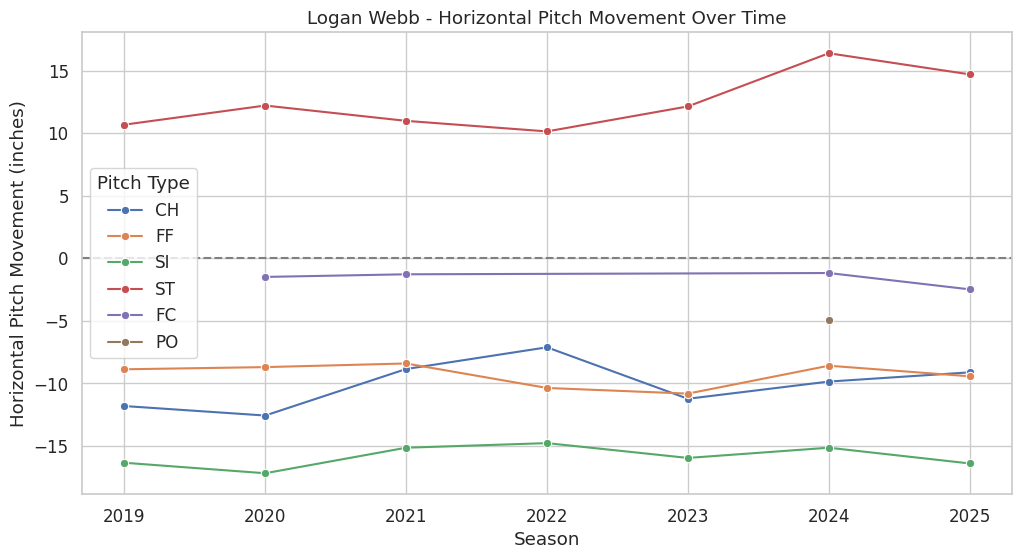

In [ ]:
# Convert feet to inches
webb_data['pfx_x_inches'] = webb_data['pfx_x'] * 12
webb_data['pfx_z_inches'] = webb_data['pfx_z'] * 12

# Group by season and pitch type
movement_summary = webb_data.groupby(['season', 'pitch_type']).agg({
    'pfx_x_inches': 'mean',
    'pfx_z_inches': 'mean'
}).reset_index()

# Line plot showing how movement evolved for each pitch
sns.set(style='whitegrid', font_scale=1.1)

plt.figure(figsize=(12,6))
sns.lineplot(data=movement_summary, x='season', y='pfx_x_inches', hue='pitch_type', marker='o')
plt.title('Logan Webb - Horizontal Pitch Movement Over Time')
plt.xlabel('Season')
plt.ylabel('Horizontal Pitch Movement (inches)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Pitch Type')
plt.show()

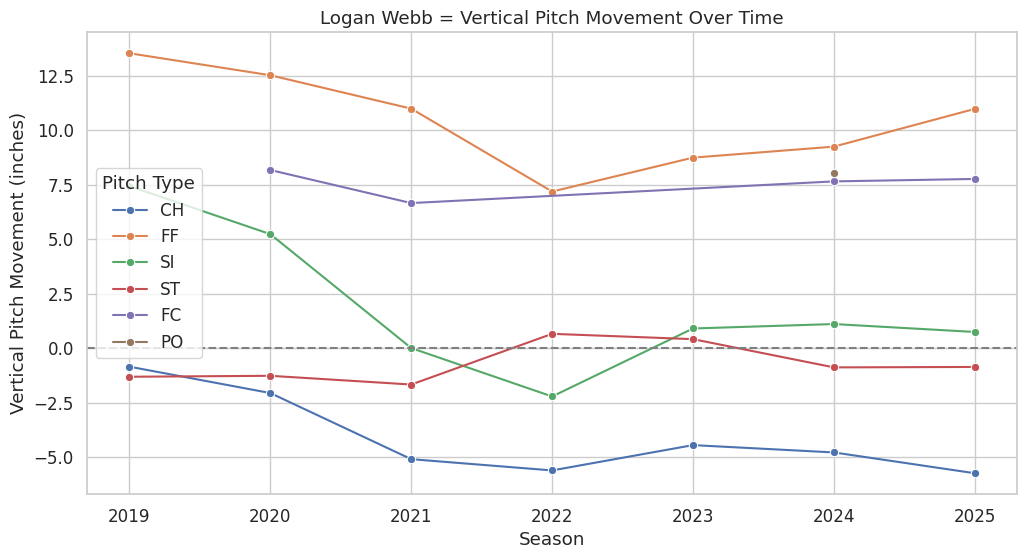

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=movement_summary, x='season', y='pfx_z_inches', hue='pitch_type', marker='o')
plt.title('Logan Webb = Vertical Pitch Movement Over Time')
plt.xlabel('Season')
plt.ylabel('Vertical Pitch Movement (inches)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(title='Pitch Type')
plt.show()

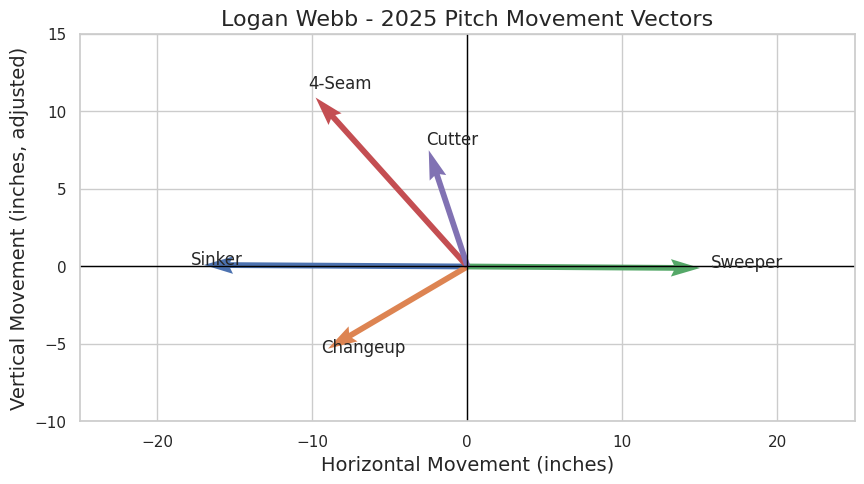

In [ ]:
data = {
    'Pitch': ['Sinker', 'Changeup', 'Sweeper', '4-Seam', 'Cutter'],
    'pfx_x': [-17, -9, 15, -9.8, -2.5],
    'pfx_z': [0.1, -5.3, -0.1, 10.9, 7.5]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10,8))
sns.set(style='whitegrid')

# Movement vector plot
for i, row in df.iterrows():
  plt.quiver(0, 0, row['pfx_x'], row['pfx_z'], angles='xy', scale_units='xy', scale=1, color='C'+str(i), label=row['Pitch'])
  plt.text(row['pfx_x']*1.05, row['pfx_z']*1.05, row['Pitch'], fontsize=12)

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim(-25, 25)
plt.ylim(-10, 15)
plt.xlabel('Horizontal Movement (inches)', fontsize=14)
plt.ylabel('Vertical Movement (inches, adjusted)', fontsize=14)
plt.title('Logan Webb - 2025 Pitch Movement Vectors', fontsize=16)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()